In [4]:
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig

!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/mod

/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
Arg Error: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/mod" is not a folder or mod file name or prefix

  Mod file, folder args: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/mod"
Traceback (most recent call last):
  File "/home/wzl/anaconda/envs/nest/bin/nrnivmodl", line 94, in <module>
    subprocess.check_call([exe, *sys.argv[1:]])
  File "/home/wzl/anaconda/envs/nest/lib/python3.10/subprocess.py", line 369, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.CalledProcessError: Command '['/home/wzl/anaconda/envs/nest/lib/python3.10/site-packages/neuron/.data/bin/nrnivmodl', '/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/mod']' returned non-zero exit status 1.


In [2]:
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', xlim=[0,100],dx=20,ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', ylabel = 'Frequency/Hz', label='',ynum_decimals =1):
    
    ax2.plot(x,y,color=color,linewidth=2,alpha=alpha, label=label)
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')



In [3]:
h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)


NEURON: Couldn't find: /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/models/L5PCbiophys1.hoc
 near line 0
 ^
NEURON: Couldn't find: /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC/models/L5PCtemplate.hoc
 near line 0
 ^


0.0

In [85]:
loc=int(58)
loc1=int(0)
loc2=int(2)
x_soma = (L5PC.soma[0].x3d(0)+ L5PC.soma[0].x3d(1))/2
y_soma = (L5PC.soma[0].y3d(0)+ L5PC.soma[0].y3d(1))/2
z_soma = (L5PC.soma[0].z3d(0)+ L5PC.soma[0].z3d(1))/2
x_syn = (L5PC.dend[loc].x3d(0)+ L5PC.dend[loc].x3d(1))/2
y_syn = (L5PC.dend[loc].y3d(0)+ L5PC.dend[loc].y3d(1))/2
z_syn = (L5PC.dend[loc].z3d(0)+ L5PC.dend[loc].z3d(1))/2
x_syn1 = (L5PC.dend[loc1].x3d(0)+ L5PC.dend[loc1].x3d(1))/2
y_syn1 = (L5PC.dend[loc1].y3d(0)+ L5PC.dend[loc1].y3d(1))/2
z_syn1 = (L5PC.dend[loc1].z3d(0)+ L5PC.dend[loc1].z3d(1))/2
x_syn2 = (L5PC.dend[loc2].x3d(0)+ L5PC.dend[loc2].x3d(1))/2
y_syn2 = (L5PC.dend[loc2].y3d(0)+ L5PC.dend[loc2].y3d(1))/2
z_syn2 = (L5PC.dend[loc2].z3d(0)+ L5PC.dend[loc2].z3d(1))/2
# x_soma = L5PC.soma[0].x3d(0)
# y_soma = L5PC.soma[0].y3d(0)
# z_soma = L5PC.soma[0].z3d(0)
# x_syn = L5PC.dend[loc].x3d(0)
# y_syn = L5PC.dend[loc].y3d(0)
# z_syn = L5PC.dend[loc].z3d(0)
# x_syn1 = L5PC.dend[loc1].x3d(0)
# y_syn1 = L5PC.dend[loc1].y3d(0)
# z_syn1 = L5PC.dend[loc1].z3d(0)


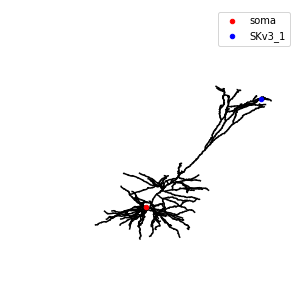

In [95]:
# from neuron import h
# from matplotlib import pyplot, cm

# ps = h.PlotShape(True)
# ax = ps.plot(plotly)
# ax.show()

from neuron import h
from matplotlib import pyplot, cm

ps = h.PlotShape(True)
ax = ps.plot(pyplot)
# 将神经元图的线条颜色更改为黑色
for line in ax.lines:
    line.set_color('black')

# 在原点标记一个点
ax.scatter([x_soma], [y_soma],[z_soma], color='red', s=20, marker='o', label='soma')
# ax.scatter([x_syn], [y_syn],[z_syn], color='blue', s=20, marker='o', label='58')
# ax.scatter([x_syn1], [y_syn1],[z_syn1], color='yellow', s=20, marker='o', label='0')
# ax.scatter([x_syn2], [y_syn2],[z_syn2], color='green', s=20, marker='o', label='2')
sec=L5PC.apic[73]
ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                   color='blue', s=20, marker='o', label='SKv3_1')
ax.legend(loc='best')
          
# ax.text(x_syn, y_syn, z_syn,'58', color='red', fontsize=12, ha='right')

# 设置坐标轴范围
ax.set_xlim([-700, 0])  # 替换 xmin 和 xmax 为所需的 x 范围
ax.set_ylim([500, 1400])  # 替换 ymin 和 ymax 为所需的 y 范围
ax.set_zlim([-1000, 00])  # 替换 zmin 和 zmax 为所需的 z 范围
# 关闭网格
ax.grid(False)
# 关闭坐标轴
ax.axis('off')
pyplot.show()


# single synaptic input

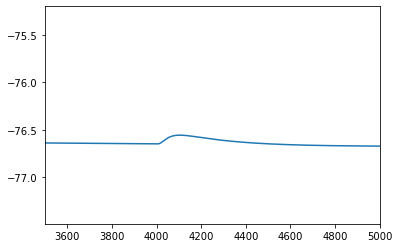

In [21]:
L5PC = h.L5PCtemplate(morphologyFilename)
passive = False

if passive:
    for sec in h.allsec():
        # 检查 section 是否有主动离子通道
        if h.ismembrane("na3", sec=sec):
            # 将电导设置为0
            sec.gbar_na3 = 0.
        if h.ismembrane("h", sec=sec):
            sec.ghdbar_h = 0.
        if h.ismembrane("kadist", sec=sec):
            sec.gkabar_kadist = 0.
        if h.ismembrane("kaprox", sec=sec):
            sec.gkabar_kaprox = 0.
        if h.ismembrane("kdrca1", sec=sec):
            sec.gkdrbar_kdrca1 = 0.
        if h.ismembrane("nax", sec=sec):
            sec.gbar_nax = 0.
        if h.ismembrane("Ca_HVA",sec=sec):
            sec.gCa_HVAbar_Ca_HVA = 0.
        if h.ismembrane("Ca_LVAst",sec=sec):
            sec.gCa_LVAstbar_Ca_LVAst = 0.
        if h.ismembrane("Ih",sec=sec):
            sec.gIhbar_Ih = 0.
        if h.ismembrane("Im",sec=sec):
            sec.gImbar_Im = 0.
        if h.ismembrane("K_Pst",sec=sec):
            sec.gK_Pstbar_K_Pst = 0.
        if h.ismembrane("K_Tst",sec=sec):
            sec.gK_Tstbar_K_Tst = 0.
        if h.ismembrane("Nap_Et2",sec=sec):
            sec.gNap_Et2bar_Nap_Et2 = 0.
        if h.ismembrane("NaTa_t",sec=sec):
            sec.gNaTa_tbar_NaTa_t = 0.
        if h.ismembrane("NaTs2_t",sec=sec):
            sec.gNaTs2_tbar_NaTs2_t = 0.
        if h.ismembrane("SK_E2",sec=sec):
            sec.gSK_E2bar_SK_E2 = 0.
        if h.ismembrane("SKv3_1",sec=sec):
            sec.gSKv3_1bar_SKv3_1 = 0.
        
recv = h.Vector()
recv.record(L5PC.soma[0](0.5)._ref_v)

# Set simulation parameters
h.dt = 0.1
h.tstop = 500
h.v_init = -77

# Initialize an excitatory or inhibitory synaptic input
# make a new stimulator
stim = h.NetStim()

# attach it to a synapse
syn = h.Exp2Syn(L5PC.dend[58](0.9))
syn.tau1 = 1.  # ms
syn.tau2 = 5.  # ms
syn.e = 0.  # mV for E input and -100 for I input

stim.number = 1
stim.start = 400.  # ms
ncstim = h.NetCon(stim, syn)
ncstim.delay = 0.
ncstim.weight[0] = 1e-4  # uS


def initialize():
    h.t = 0
    h.finitialize(h.v_init)
    h.fcurrent()

# Function to integrate the simulation
def integrate():
    while h.t < h.tstop:
        h.fadvance()

# Function to run the simulation
def go():
    initialize()
    integrate()

# Main simulation loop
def main():
    go()
    plt.plot(recv)
    plt.axvline(x=100, color='r')
    plt.xlim([3500,5000])
    # plt.ylim([-77,-76.5])

main()

In [9]:
def exp_fitting(x,y, num=1):
    
    if num==2:
        # Calculate integrals
        iy1 = cumtrapz(y, x, initial=0)
        iy2 = cumtrapz(iy1, x, initial=0)


        # Get exponentials lambdas
        Y = np.column_stack((iy1, iy2,  x**2, x, np.ones_like(x)))
        A = pinv(Y) @ y

        lambdas = eig(np.array([[A[0], A[1]], [1, 0]]))[0]
        # print("Lambdas:", lambdas)

        # Get exponentials multipliers
        X = np.column_stack((np.ones_like(x), np.exp(lambdas[0] * x), np.exp(lambdas[1] * x)))
        P = pinv(X) @ y
        # print("Multipliers:", P)
    
    if num==1:
        iy1 = cumtrapz(y, x, initial=0)

        # Get exponentials lambdas
        Y = np.column_stack((iy1, x, np.ones_like(x)))
        A = pinv(Y) @ y

        lambdas = A[0]
        # print("Lambdas:", lambdas)


        # Get exponentials multipliers
        X = np.column_stack((np.ones_like(x), np.exp(lambdas * x)))
        P = pinv(X) @ y
        # print("Multipliers:", P)
    
    return lambdas, P

def time_constant_fitting(run_dt, dtime, fE, passive=False):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    recv = h.Vector()
    recv.record(L5PC.soma[0](0.5)._ref_v)
    
    if passive:
        for sec in h.allsec():
            # 检查 section 是否有主动离子通道
            if h.ismembrane("na3", sec=sec):
                # 将电导设置为0
                sec.gbar_na3 = 0.
            if h.ismembrane("h", sec=sec):
                sec.ghdbar_h = 0.
            if h.ismembrane("kadist", sec=sec):
                sec.gkabar_kadist = 0.
            if h.ismembrane("kaprox", sec=sec):
                sec.gkabar_kaprox = 0.
            if h.ismembrane("kdrca1", sec=sec):
                sec.gkdrbar_kdrca1 = 0.
            if h.ismembrane("nax", sec=sec):
                sec.gbar_nax = 0.
            if h.ismembrane("Ca_HVA",sec=sec):
                sec.gCa_HVAbar_Ca_HVA = 0.
            if h.ismembrane("Ca_LVAst",sec=sec):
                sec.gCa_LVAstbar_Ca_LVAst = 0.
            if h.ismembrane("Ih",sec=sec):
                sec.gIhbar_Ih = 0.
            if h.ismembrane("Im",sec=sec):
                sec.gImbar_Im = 0.
            if h.ismembrane("K_Pst",sec=sec):
                sec.gK_Pstbar_K_Pst = 0.
            if h.ismembrane("K_Tst",sec=sec):
                sec.gK_Tstbar_K_Tst = 0.
            if h.ismembrane("Nap_Et2",sec=sec):
                sec.gNap_Et2bar_Nap_Et2 = 0.
            if h.ismembrane("NaTa_t",sec=sec):
                sec.gNaTa_tbar_NaTa_t = 0.
            if h.ismembrane("NaTs2_t",sec=sec):
                sec.gNaTs2_tbar_NaTs2_t = 0.
            if h.ismembrane("SK_E2",sec=sec):
                sec.gSK_E2bar_SK_E2 = 0.
            if h.ismembrane("SKv3_1",sec=sec):
                sec.gSKv3_1bar_SKv3_1 = 0.
            if h.ismembrane("CaDynamics_E2",sec=sec):
                sec.gamma_CaDynamics_E2 = 0.    
    
    
    # Set simulation parameters
    h.dt = run_dt
    h.tstop = 200
    h.v_init = -77
    v_clamp = -77


    # Initialize an excitatory or inhibitory synaptic input
    # make a new stimulator
    stim = h.NetStim()

    # attach it to a synapse
    syn = h.Exp2Syn(L5PC.dend[58](0.9))
    syn.tau1 = 1.  # ms
    syn.tau2 = 5.  # ms
    syn.e = 0.  # mV for E input and -100 for I input

    stim.number = 1
    stim.start = 100.  # ms
    ncstim = h.NetCon(stim, syn)
    ncstim.delay = 0.
    ncstim.weight[0] = 0e-2  # uS


    # Initialize voltage clamp
    vclamp = h.SEClamp(L5PC.soma[0](0.5))
    vclamp.amp1 = v_clamp
    vclamp.dur2 = h.tstop
    vclamp.amp2 = v_clamp - 20

    irec = h.Vector()
    irec.record(vclamp._ref_i)

    # Function to initialize the simulation
    def initialize():
        h.t = 0
        h.finitialize(h.v_init)
        h.fcurrent()

    # Function to integrate the simulation
    def integrate():
        while h.t < h.tstop:
            h.fadvance()

    # Function to run the simulation
    def go():
        initialize()
        integrate()

    # Main simulation loop
    def main():
        # vol = h.Vector()
    
        # savdata = open("neuron_voltage.dat", "w")
        T = 200/run_dt+1
        N = int(10/dtime)
        data = np.zeros((2*N, int(T)))


        for i in range(1, N+1):
            vclamp.dur1 = 100 + i * dtime

            ncstim.weight[0] = 0e-2
            go()
            # data[4*(i-1),:] = recv.to_python()  # Assuming recv is a NEURON Vector
            data[2*(i-1),:] = irec.to_python()  # Assuming irec is a NEURON Vector

            
            ncstim.weight[0] = fE
            go()
            # data[4*(i-1)+2,:] = recv.to_python()  # Assuming recv is a NEURON Vector
            data[2*(i-1)+1,:] = irec.to_python()  # Assuming irec is a NEURON Vector

        # np.savetxt("neuron_voltage.txt", data)
        # print("Done data!")
        I_w_ng = data[::2, :]
        I_w_g = data[1::2, :]
        diff_I = I_w_ng - I_w_g
        x = np.arange(0.1, 10.1, dtime) # ms
        y = -np.sum(diff_I, axis=1)  # size of 100

        result_lambdas, result_multipliers = exp_fitting(x, y, num=2)
        ground_truth = np.array([-1, -0.2])
        relative_error = np.abs((result_lambdas-ground_truth)/ground_truth)
        return result_lambdas, relative_error
    
    
    result_lambdas, relative_error = main()
    return result_lambdas, relative_error

    

In [24]:
result_lambdas, relative_error = time_constant_fitting(0.1, 0.1, 1e-6)
ground_truth = np.array([-1, -0.2])
relative_error = np.abs((result_lambdas-ground_truth)/ground_truth)
print("result_lambdas:", 1.0/result_lambdas)
print("ground_truth:", 1./ground_truth)
print("relative_error:",relative_error)

result_lambdas: [-0.74238255 -3.20033745]
ground_truth: [-1. -5.]
relative_error: [0.34701442 0.56233525]


In [25]:
# fE = np.arange(1e-5, 1e-2, 5.e-5)
fE = np.linspace(1e-5, 1e-2, 100)
estimated_lambdas = np.zeros((len(fE), 2))
relative_error = np.zeros((len(fE), 2))
absolute_error = np.zeros((len(fE), 2))
for i in range(len(fE)):
    fE0 = fE[i]
    estimated_lambdas[i,:], relative_error[i,:] = time_constant_fitting(0.1, 0.1, fE0)
    absolute_error[i,:] = np.abs(estimated_lambdas[i,:] - np.array([-1., -0.2]))

np.savetxt("estimated_lambdas_fI.txt", estimated_lambdas)
np.savetxt("relative_error_fI.txt", relative_error)
np.savetxt("absolute_error_fI.txt", absolute_error)

/tmp/ipykernel_53530/1985867732.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  estimated_lambdas[i,:], relative_error[i,:] = time_constant_fitting(0.1, 0.1, fE0)


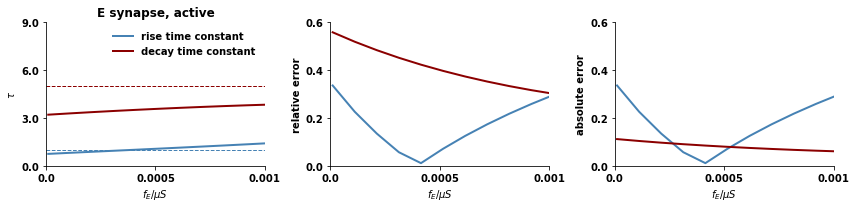

In [33]:
estimated_lambdas = np.loadtxt("estimated_lambdas_fE.txt")
relative_error = np.loadtxt("relative_error_fE.txt")
absolute_error = np.loadtxt("absolute_error_fE.txt")
fE = fE = np.linspace(1e-5, 1e-2, 100)
fig, ax2 = plt.subplots(1,3, figsize = (12,3))
plot_curve(ax2[0], fE, -1./estimated_lambdas[:,0], color='steelblue', title='E synapse, active', xlim=[0,1e-3],ylim=[0,9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = r'$\tau$', label='rise time constant')
plot_curve(ax2[0], fE, -1./estimated_lambdas[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,9], dy=3, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = r'$\tau$', label='decay time constant')
ax2[0].axhline(y=1, color='steelblue', linestyle='--', linewidth=1)
ax2[0].axhline(y=5, color='darkred', linestyle='--', linewidth=1)
plot_curve(ax2[1], fE, relative_error[:,0], color='steelblue', title='', xlim=[0,1e-3],ylim=[0,0.9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'relative error', label='')
plot_curve(ax2[1], fE, relative_error[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,0.6], dy=0.2, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'relative error', label='')
plot_curve(ax2[2], fE, absolute_error[:,0], color='steelblue', title='', xlim=[0,1e-3],ylim=[0,0.9],alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel = 'absolute error', label='')
plot_curve(ax2[2], fE, absolute_error[:,1], color='darkred', title='', xlim=[0,1e-3], dx=5e-4, ylim=[0,0.6], dy=0.2, alpha = 1.0, xlabel=r'$f_{E}/\mu S$', ylabel ='absolute error', label='')
plt.tight_layout()


# passive neuron

In [15]:
result_lambdas, relative_error = time_constant_fitting(0.1, 0.1, 1e-3, passive=True)
ground_truth = np.array([-1, -0.2])
relative_error = np.abs((result_lambdas-ground_truth)/ground_truth)
print("result_lambdas:", 1.0/result_lambdas)
print("ground_truth:", 1./ground_truth)
print("relative_error:",relative_error)

result_lambdas: [-1.57380921 -5.49875476]
ground_truth: [-1. -5.]
relative_error: [0.36459896 0.09070322]


In [16]:
result_lambdas, relative_error = time_constant_fitting(0.1, 0.1, 1e-4, passive=True)
ground_truth = np.array([-1, -0.2])
relative_error = np.abs((result_lambdas-ground_truth)/ground_truth)
print("result_lambdas:", 1.0/result_lambdas)
print("ground_truth:", 1./ground_truth)
print("relative_error:",relative_error)

result_lambdas: [-1.05734471 -5.06291303]
ground_truth: [-1. -5.]
relative_error: [0.05423464 0.01242625]


In [11]:
# fE = np.arange(1e-5, 1e-2, 5.e-5)
fE = np.linspace(1e-4, 1e-3, 30)
estimated_lambdas = np.zeros((len(fE), 2))
relative_error = np.zeros((len(fE), 2))
absolute_error = np.zeros((len(fE), 2))
for i in range(len(fE)):
    fE0 = fE[i]
    estimated_lambdas[i,:], relative_error[i,:] = time_constant_fitting(0.1, 0.1, fE0, passive=True)
    absolute_error[i,:] = np.abs(estimated_lambdas[i,:] - np.array([-1., -0.2]))

np.savetxt("estimated_lambdas_passive_fE.txt", estimated_lambdas)
np.savetxt("relative_error_passive_fE.txt", relative_error)
np.savetxt("absolute_error_passive_fE.txt", absolute_error)

KeyboardInterrupt: 

In [9]:
L5PC = h.L5PCtemplate(morphologyFilename)
for sec in h.allsec():
    # 检查 section 是否有主动离子通道
    if h.ismembrane("na3", sec=sec):
        # 将电导设置为0
        sec.gbar_na3 = 0.
    if h.ismembrane("h", sec=sec):
        sec.ghdbar_h = 0.
    if h.ismembrane("kadist", sec=sec):
        sec.gkabar_kadist = 0.
    if h.ismembrane("kaprox", sec=sec):
        sec.gkabar_kaprox = 0.
    if h.ismembrane("kdrca1", sec=sec):
        sec.gkdrbar_kdrca1 = 0.
    if h.ismembrane("nax", sec=sec):
        sec.gbar_nax = 0.
    if h.ismembrane("Ca_HVA",sec=sec):
        sec.gCa_HVAbar_Ca_HVA = 0.
    if h.ismembrane("Ca_LVAst",sec=sec):
        sec.gCa_LVAstbar_Ca_LVAst = 0.
    if h.ismembrane("Ih",sec=sec):
        sec.gIhbar_Ih = 0.
    if h.ismembrane("Im",sec=sec):
        sec.gImbar_Im = 0.
    if h.ismembrane("K_Pst",sec=sec):
        sec.gK_Pstbar_K_Pst = 0.
    if h.ismembrane("K_Tst",sec=sec):
        sec.gK_Tstbar_K_Tst = 0.
    if h.ismembrane("Nap_Et2",sec=sec):
        sec.gNap_Et2bar_Nap_Et2 = 0.
    if h.ismembrane("NaTa_t",sec=sec):
        sec.gNaTa_tbar_NaTa_t = 0.
    if h.ismembrane("NaTs2_t",sec=sec):
        sec.gNaTs2_tbar_NaTs2_t = 0.
    if h.ismembrane("SK_E2",sec=sec):
        sec.gSK_E2bar_SK_E2 = 0.
    if h.ismembrane("SKv3_1",sec=sec):
        sec.gSKv3_1bar_SKv3_1 = 0.

In [11]:
# L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].psection()

{'point_processes': {},
 'density_mechs': {'pas': {'g': [3.44e-05], 'e': [-90.0], 'i': [0.0]},
  'CaDynamics_E2': {'gamma': [0.000549],
   'decay': [486.0],
   'depth': [0.1],
   'minCai': [0.0001]},
  'Ca_HVA': {'gCa_HVAbar': [0.0],
   'ica': [0.0],
   'gCa_HVA': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Ca_LVAst': {'gCa_LVAstbar': [0.0],
   'ica': [0.0],
   'gCa_LVAst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Ih': {'gIhbar': [0.0], 'ihcn': [0.0], 'gIh': [0.0], 'm': [0.0]},
  'K_Pst': {'gK_Pstbar': [0.0],
   'ik': [0.0],
   'gK_Pst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'K_Tst': {'gK_Tstbar': [0.0],
   'ik': [0.0],
   'gK_Tst': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'Nap_Et2': {'gNap_Et2bar': [0.0],
   'ina': [0.0],
   'gNap_Et2': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'NaTa_t': {'gNaTa_tbar': [0.0],
   'ina': [0.0],
   'gNaTa_t': [0.0],
   'm': [0.0],
   'h': [0.0]},
  'SK_E2': {'gSK_E2bar': [0.0], 'ik': [0.0], 'gSK_E2': [0.0], 'z': [0.0]},
  'SKv3_1': {'gSKv3_1bar': [0.0], 'ik'